## Övning 2.2

Uppgiften lyder
<img src="img/exe2.2.png">

Vi räknar först ut stickprovets medelvärde

In [3]:
from math import *
stickprov = [15.1,21.2,18.5,25.3,19.2,16.0,17.8]

In [4]:
summa = 0.0
antal = 0
for punkt in stickprov:
    summa += punkt
    antal += 1
medel = summa/antal
print medel

19.0142857143


Sedan räknar vi ut standardavvikelsen av stickprovet

In [5]:
kvadrat_summa = 0.0
for punkt in stickprov:
    kvadrat_summa += (punkt-medel)**2
varians=kvadrat_summa/(antal-1)
standardavvikelse = sqrt(varians)
print standardavvikelse

3.42706316031


Vi tar sedan reda på $t^{0.975}_6$ och $t^{0.995}_6$ för att använda i 2-sidig konfidensintervalls bestämning för 95% och 99% intervall. Vi skulle även kunnat använda tabellen A.2 i Apendix A för att bestämma de här värdena.

In [6]:
from scipy.stats import t
t95 = t.ppf(0.975,antal-1)
t99 = t.ppf(0.995,antal-1)
print t95, t99

2.44691184879 3.70742802132


In [7]:
upp = medel + standardavvikelse*t95/sqrt(antal)
ner = medel - standardavvikelse*t95/sqrt(antal)
print "95%% konfidensintervall för morfinnivån är %f till %f" % (ner,upp)

95% konfidensintervall för morfinnivån är 15.844781 till 22.183791


In [8]:
upp = medel + standardavvikelse*t99/sqrt(antal)
ner = medel - standardavvikelse*t99/sqrt(antal)
print "99%% konfidensintervall för morfinnivån är %f till %f" % (ner,upp)

99% konfidensintervall för morfinnivån är 14.212024 till 23.816547


### Alternativa lösningar
Nu när vi har svartet, kan vi äve se att det finns alternativa sätt att räkna ut medelvärde och standard avvikelse, tex

In [9]:
import numpy as np
summa = np.sum(stickprov)
medel = summa/len(stickprov)
print medel
residy = stickprov - medel
kvadrat_residy = residy*residy
varians=np.sum(kvadrat_residy)/(len(residy)-1)
standardavvikelse = np.sqrt(varians)
print standardavvikelse

19.0142857143
3.42706316031


Vidare skulle vi kan vi om bara:

In [10]:
medel = np.mean(stickprov)
standardavvikelse = np.std(stickprov,ddof=1)
print t.interval(0.95,antal-1,loc=medel,scale=standardavvikelse/sqrt(antal))
print t.interval(0.99,antal-1,loc=medel,scale=standardavvikelse/sqrt(antal))

(15.844780924302782, 22.183790504268643)
(14.212024088919481, 23.816547339651944)


Dokumentation av scipys t-funktion läses [här](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)

### Visualisering

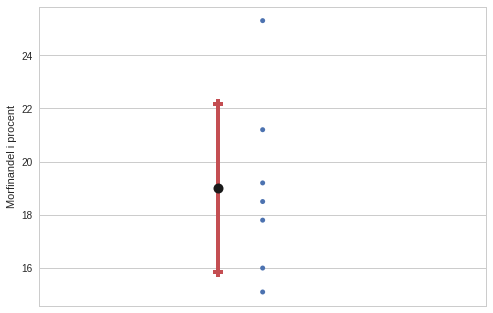

In [56]:
upp = medel + standardavvikelse*t95/sqrt(antal)
ner = medel - standardavvikelse*t95/sqrt(antal)

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.DataFrame(stickprov,columns=["Morfinandel i procent"])
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(data=df,y="Morfinandel i procent")
plt.plot([-0.1,-0.1],[upp,ner],'r-',marker='P',ms=10,lw=4)
plt.plot(-0.1,medel,'k+',marker='.',ms=20)
